In [6]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow import keras

In [7]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [11]:
x_train.shape

(60000, 28, 28)

In [13]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [15]:
x_train[0].shape

(28, 28)

In [17]:
import matplotlib.pyplot as plt

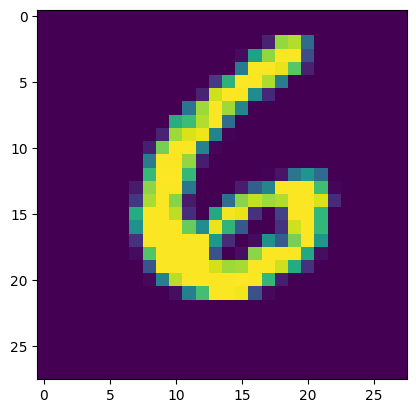

In [20]:
plt.imshow(x_train[90])

In [23]:
x_train = x_train/255
x_test = x_test/255

In [26]:
model = Sequential()
model.add(Flatten(input_shape =(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [37]:
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0144 - accuracy: 0.9957 - val_loss: 0.1052 - val_accuracy: 0.9732
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0122 - accuracy: 0.9961 - val_loss: 0.1039 - val_accuracy: 0.9742
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.1019 - val_accuracy: 0.9765
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0068 - accuracy: 0.9982 - val_loss: 0.1185 - val_accuracy: 0.9726
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0101 - accuracy: 0.9968 - val_loss: 0.1084 - val_accuracy: 0.9760
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.1190 - val_accuracy: 0.9740
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0059 - accuracy: 0.9983 - val_loss: 0.1114 - val_accuracy:

In [32]:
prob = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [34]:
y_pred = prob.argmax(axis=1)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,y_pred)

0.9782

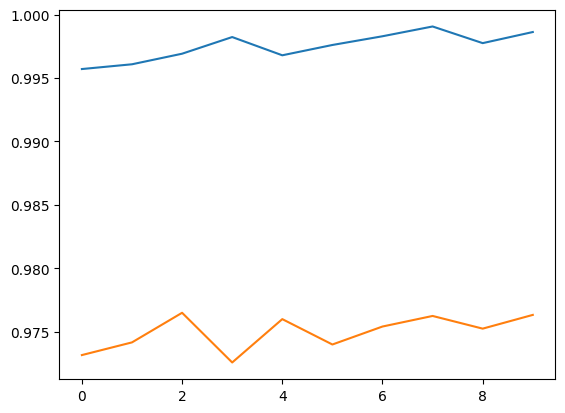

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

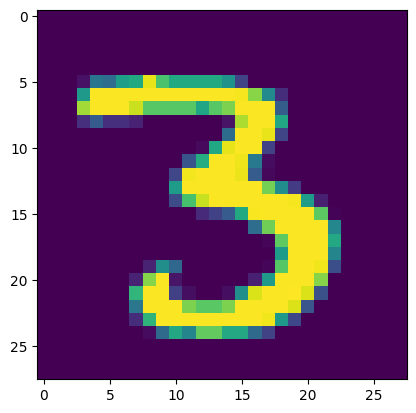

In [47]:
plt.imshow(x_train[12])

In [48]:
model.predict(x_train[12].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 116ms/step


array([3])